In [60]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


    
#I read data of car severity from csv format to dataframe
df_car_severity = pd.read_csv(body)
df_car_severity.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [66]:
#The columns 'ROADCOND' (road conditions) and 'LIGHTCOND' (light conditions) are used like independent variables
#The column 'SEVERITYCODE' is used like dependent variable
#so I put data in different dataframe
df_severity_code_conditions = df_car_severity[['SEVERITYCODE','ROADCOND','LIGHTCOND']]
df_severity_code_conditions




,SEVERITYCODE,ROADCOND,LIGHTCOND
0,2,Wet,Daylight
1,1,Wet,Dark - Street Lights On
2,1,Dry,Daylight
3,1,Dry,Daylight
4,2,Wet,Daylight
5,1,Dry,Daylight
6,1,Wet,Daylight
7,2,Dry,Daylight
8,1,Dry,Daylight
9,2,Dry,Daylight


In [63]:
#Because I don't want to have NaN values, I delete them
df_severity_code_conditions = df_severity_code_conditions.dropna()
#Then I reset index to restablish indexes of data without NaN values
df_severity_code_conditions.reset_index(drop=True)
df_severity_code_conditions

,SEVERITYCODE,ROADCOND,LIGHTCOND
0,2,Wet,Daylight
1,1,Wet,Dark - Street Lights On
2,1,Dry,Daylight
3,1,Dry,Daylight
4,2,Wet,Daylight
5,1,Dry,Daylight
6,1,Wet,Daylight
7,2,Dry,Daylight
8,1,Dry,Daylight
9,2,Dry,Daylight


In [64]:
#I check value counts of 'ROADCOND' column
df_severity_code_conditions['ROADCOND'].value_counts()


Dry               124372
Wet                47438
Unknown            15041
Ice                 1208
Snow/Slush          1000
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64

In [65]:
#I check value counts of column 'LIGHTCOND', which is light conditions
df_severity_code_conditions['LIGHTCOND'].value_counts()

Daylight                    116117
Dark - Street Lights On      48483
Unknown                      13464
Dusk                          5897
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1197
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [67]:
#I check data types of columns of data
df_severity_code_conditions.dtypes

SEVERITYCODE     int64
ROADCOND        object
LIGHTCOND       object
dtype: object

In [68]:
#Because some data is in object format, I change to string format
df_severity_code_conditions['LIGHTCOND'] = df_severity_code_conditions['LIGHTCOND'].astype(str)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [69]:
#Because some data is in object format, I change to string format
df_severity_code_conditions['ROADCOND'] = df_severity_code_conditions['ROADCOND'].astype(str)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [70]:
#I check again data types
df_severity_code_conditions.dtypes

SEVERITYCODE     int64
ROADCOND        object
LIGHTCOND       object
dtype: object

In [71]:
#I apply a label encoder because I have categorical data in string format and I want to have it in numerical format
lb_encoder = LabelEncoder()
df_severity_code_conditions['LIGHTCOND_encoded'] = lb_encoder.fit_transform(df_severity_code_conditions['LIGHTCOND'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [72]:
#I apply a label encoder because I have categorical data in string format and I want to have it in numerical format
lb_encoder = LabelEncoder()
df_severity_code_conditions['ROADCOND_encoded'] = lb_encoder.fit_transform(df_severity_code_conditions['ROADCOND'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [13]:
df_severity_code_conditions

,SEVERITYCODE,ROADCOND,LIGHTCOND,LIGHTCOND_encoded,ROADCOND_encoded
0,2,Wet,Daylight,5,8
1,1,Wet,Dark - Street Lights On,2,8
2,1,Dry,Daylight,5,0
3,1,Dry,Daylight,5,0
4,2,Wet,Daylight,5,8
5,1,Dry,Daylight,5,0
6,1,Wet,Daylight,5,8
7,2,Dry,Daylight,5,0
8,1,Dry,Daylight,5,0
9,2,Dry,Daylight,5,0


In [73]:
#I define my independent variable "X" with encoded values of light conditions and road conditions
X = df_severity_code_conditions[['LIGHTCOND_encoded','ROADCOND_encoded']]
X

,LIGHTCOND_encoded,ROADCOND_encoded
0,5,8
1,2,8
2,5,0
3,5,0
4,5,8
5,5,0
6,5,8
7,5,0
8,5,0
9,5,0


In [74]:
#I define my dependent "Y" data as Severity Code of car crashes in data
Y = df_severity_code_conditions['SEVERITYCODE']
Y

0         2
1         1
2         1
3         1
4         2
5         1
6         1
7         2
8         1
9         2
10        1
11        1
12        1
13        1
14        2
15        1
16        2
17        1
18        2
19        1
20        2
21        2
22        1
23        1
24        2
25        2
26        1
27        1
28        1
29        1
         ..
194643    1
194644    1
194645    2
194646    1
194647    2
194648    1
194649    2
194650    2
194651    1
194652    1
194653    2
194654    1
194655    2
194656    2
194657    1
194658    1
194659    1
194660    2
194661    2
194662    1
194663    2
194664    1
194665    1
194666    2
194667    1
194668    2
194669    1
194670    2
194671    2
194672    1
Name: SEVERITYCODE, Length: 194673, dtype: int64

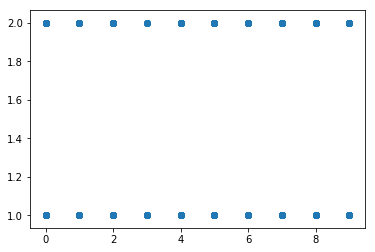

In [75]:
#I see relationship between light conditions encoded and severity codes
plt.scatter(X['LIGHTCOND_encoded'],Y)

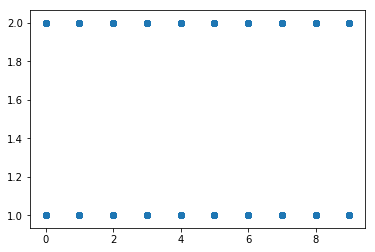

In [76]:
#I see relationship between road conditions encoded and severity codes
plt.scatter(X['ROADCOND_encoded'],Y)

In [77]:
#I make a train-test split to get data to train my model and then to test the model using 80% of data to train and 
#20% to test it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 2) (155738,)
Test set: (38935, 2) (38935,)


In [79]:
#I apply linear regression to make predictions of data splitted in train and test sets
from sklearn import linear_model

regr = linear_model.LinearRegression()
#x = np.asanyarray(X_train)
#Y = np.asanyarray(y_train)
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



Intercept: 
 1.3835641954945048
Coefficients: 
 [-0.01506272 -0.00568631]


In [80]:
#I make predictions and test my model
y_hat= regr.predict(X_test)
x = np.asanyarray(X_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))


Residual sum of squares: 0.21
Variance score: 0.01
